# Diamonds dataset - EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Load dataset
df = sns.load_dataset('diamonds')  
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# 2. Basic Information & Overview
print("Shape of Dataset : ", df.shape)
print("\nData Info :")
print(df.info())

Shape of Dataset :  (53940, 10)

Data Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


In [4]:
# 3. Summary Statistics
display(df.describe(include='all'))

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [5]:
# 4. Missing values Analysis
missing = pd.DataFrame({
    'missing_count' : df.isnull().sum(),
    'missing_percent' : (df.isnull().sum()/len(df))*100
}).sort_values(by='missing_percent', ascending=False)
print(missing)

         missing_count  missing_percent
carat                0              0.0
cut                  0              0.0
color                0              0.0
clarity              0              0.0
depth                0              0.0
table                0              0.0
price                0              0.0
x                    0              0.0
y                    0              0.0
z                    0              0.0


In [6]:
# 4a. Handling missing values (diamonds usually has no missing; check and act if present)
# Example: if any numeric column has missing, fill with median
for c in df.select_dtypes(include=['float64','int64']).columns:
    if df[c].isnull().sum() > 0:
        df[c] = df[c].fillna(df[c].median())

In [7]:
# For categorical/object columns fill with mode
for c in df.select_dtypes(include=['object','category']).columns:
    if df[c].isnull().sum() > 0:
        df[c] = df[c].fillna(df[c].mode()[0])

print('Missing values after cleaning :', df.isnull().sum().sum())

Missing values after cleaning : 0


In [8]:
# Duplication & Data type check
print("Duplicate Rows : ", df.duplicated().sum())

Duplicate Rows :  146


In [9]:
# convert some columns to category type if not already
for c in ['cut','color','clarity']:
    if c in df.columns:
        df[c] = df[c].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [10]:
# 6. Univariate Analysis - Numerical Features
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
display(df[num_cols].describe())

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


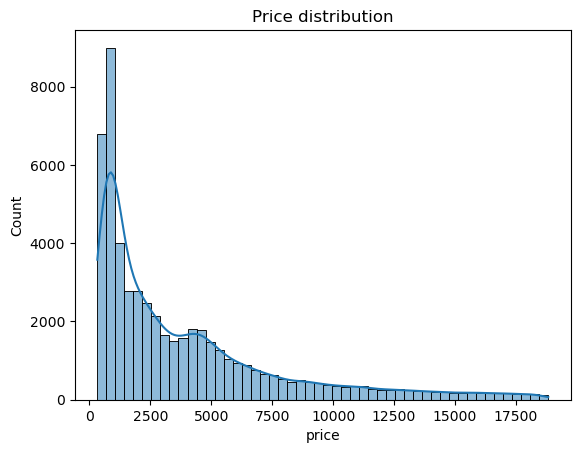

In [11]:
# Histogram : price
if 'price' in df.columns:
    sns.histplot(df['price'], bins=50, kde=True)
    plt.title("Price distribution")
    plt.show()

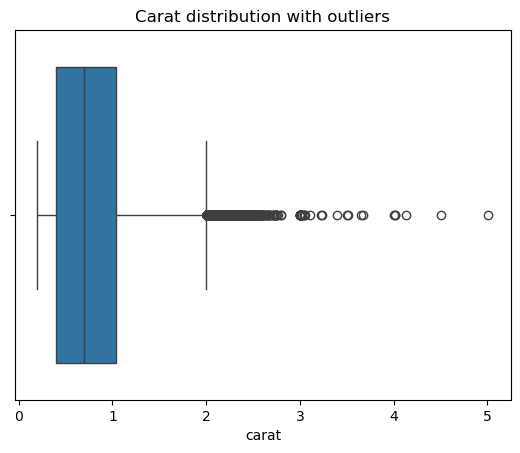

In [12]:
# Boxplot : carat
if 'carat' in df.columns:
    sns.boxplot(x=df['carat'])
    plt.title("Carat distribution with outliers")
    plt.show()

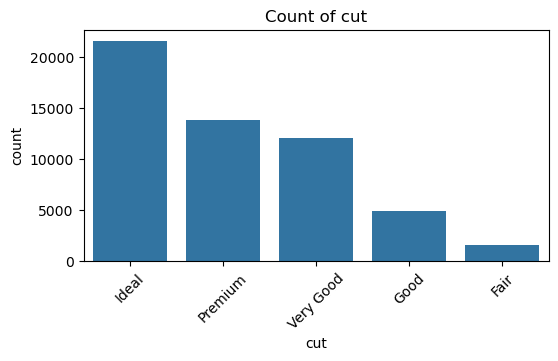

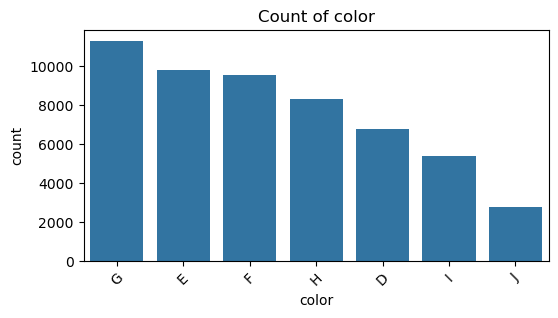

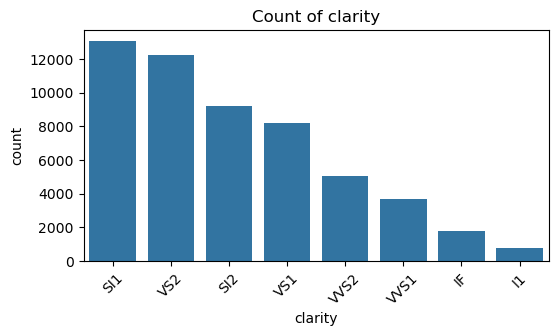

In [13]:
# Univariate Analysis - Categorical Features
cat_cols = df.select_dtypes(include=['category','object']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

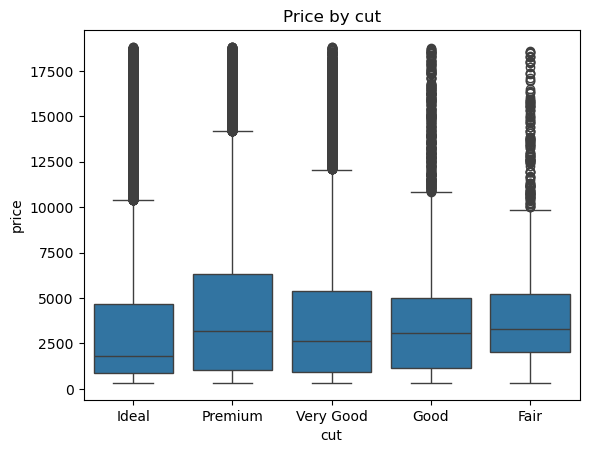

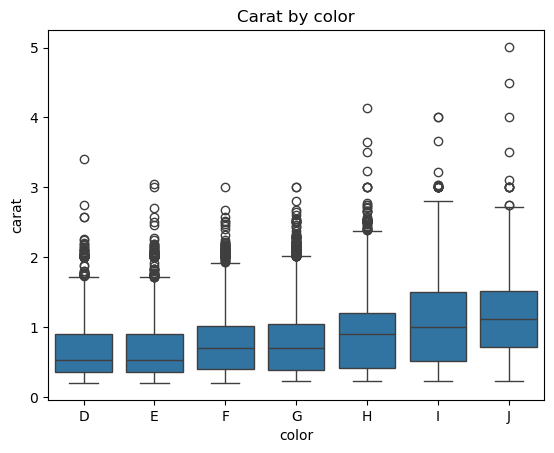

In [14]:
# Bivariate Analysis - Numerical v/s Categorical
if set(['cut','price']).issubset(df.columns):
    sns.boxplot(x='cut', y='price', data=df)
    plt.title("Price by cut")
    plt.show()

if set(['color','carat']).issubset(df.columns):
    sns.boxplot(x='color', y='carat', data=df)
    plt.title("Carat by color")
    plt.show()

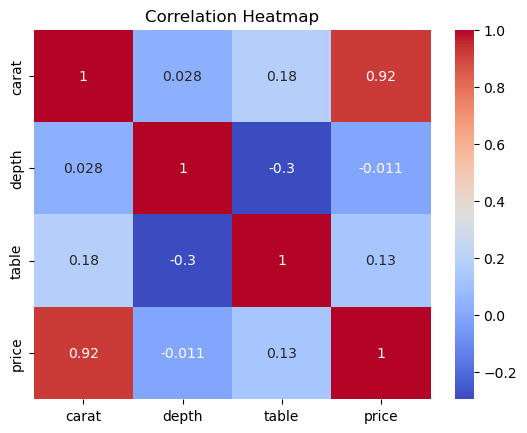

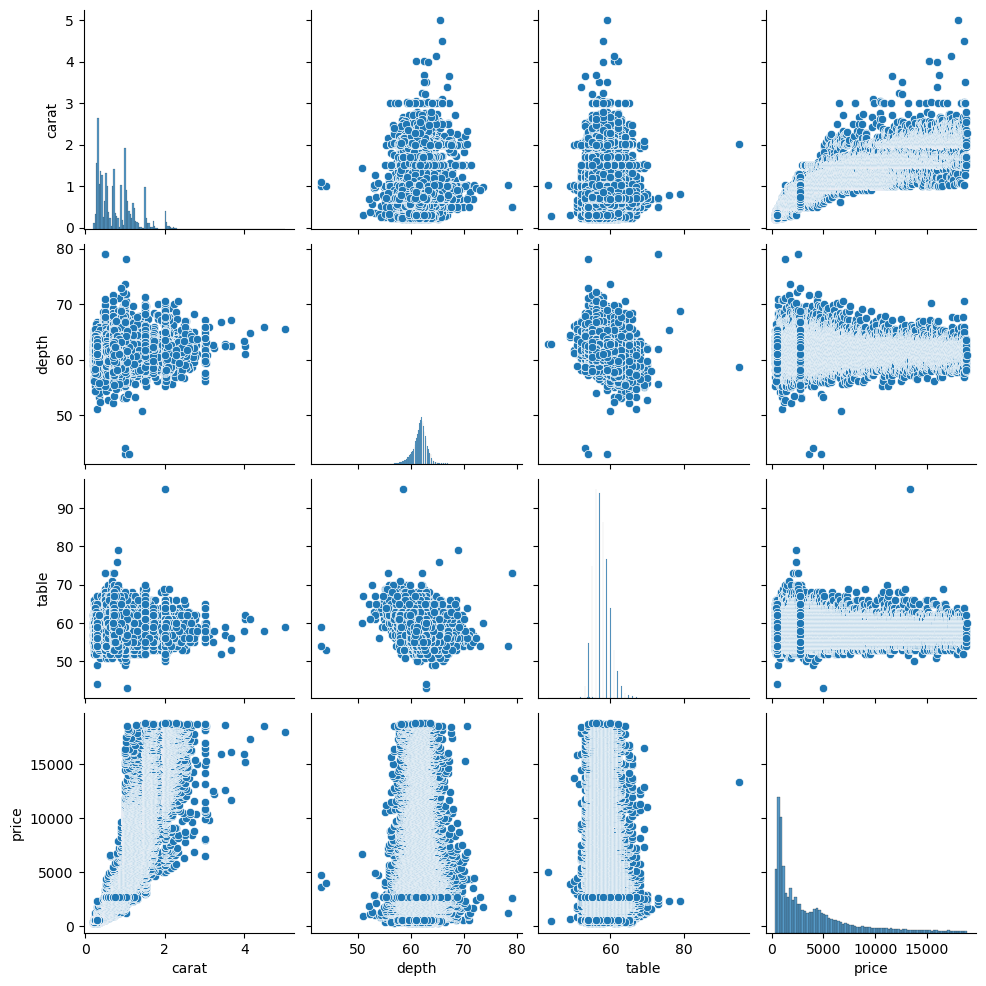

In [15]:
# Correlation and multivariate analysis
corr_cols = [c for c in ['carat','depth','table','price'] if c in df.columns]
if len(corr_cols) >= 2:
    corr = df[corr_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
    sns.pairplot(df[corr_cols])
    plt.show()

Number of outliers in price :  3540


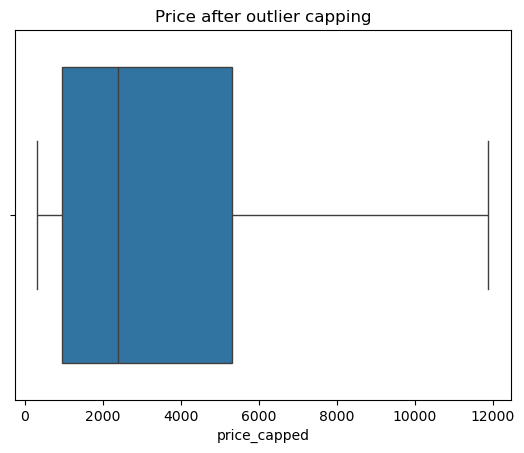

In [16]:
# Outlier detection using IQR on 'price'
if 'price' in df.columns:
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df['price'] < lower) | (df['price'] > upper)]
    print("Number of outliers in price : ",len(outliers))
    df['price_capped'] = df['price'].clip(lower, upper)
    sns.boxplot(x=df['price_capped'])
    plt.title("Price after outlier capping")
    plt.show()

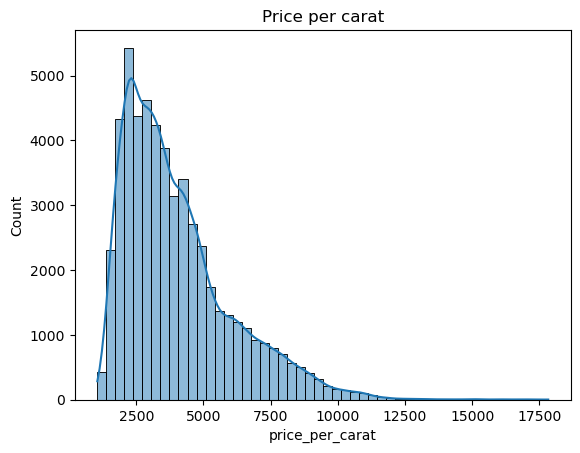

In [17]:
# Feature Engineering
# Example: price per carat
if set(['price','carat']).issubset(df.columns):
    df['price_per_carat'] = df['price'] / df['carat'].replace(0, np.nan)
    df['price_per_carat'] = df['price_per_carat'].fillna(df['price_per_carat'].median())
    sns.histplot(df['price_per_carat'], bins=50, kde=True)
    plt.title("Price per carat")
    plt.show()

In [18]:
# Export the Cleaned data
df.to_csv("diamonds_cleaned.csv", index=False)
print("\n Cleaned diamonds data saved as diamonds_cleaned.csv")


 Cleaned diamonds data saved as diamonds_cleaned.csv
